# Analysis of climate change data


## Load and cleanup data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Below the countries that contain `na`s are dropped and the mean temperature change year-on-year among all countries is plotted

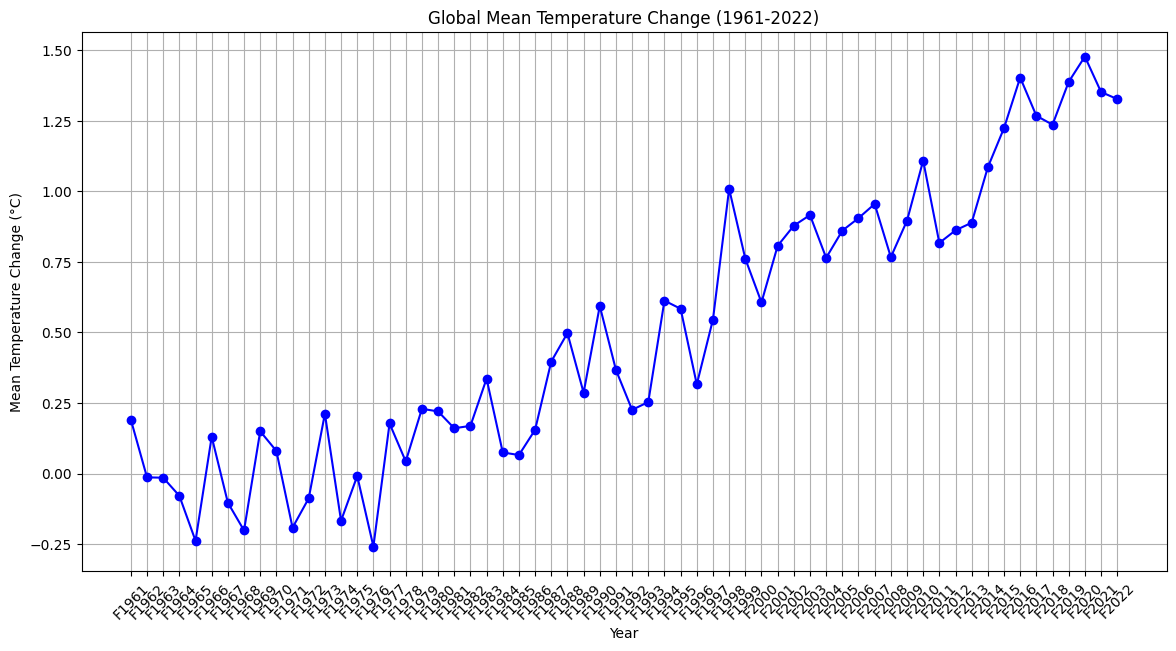

In [3]:
data_path = './climate_change_indicators.csv'
data = pd.read_csv(data_path)


data.dropna(subset=data.columns[10:], inplace=True)
year_columns = data.columns[10:]
mean_temperature_changes = data[year_columns].mean()

plt.figure(figsize=(14, 7))
plt.plot(year_columns, mean_temperature_changes, marker='o', linestyle='-', color='blue')
plt.title('Global Mean Temperature Change (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Change (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In the plot below the countries with the highest and lowest average year-on-year changes are plotted. 
In green are the 5 whose mean is the lowest, and conversely in red those for which it has been the highest

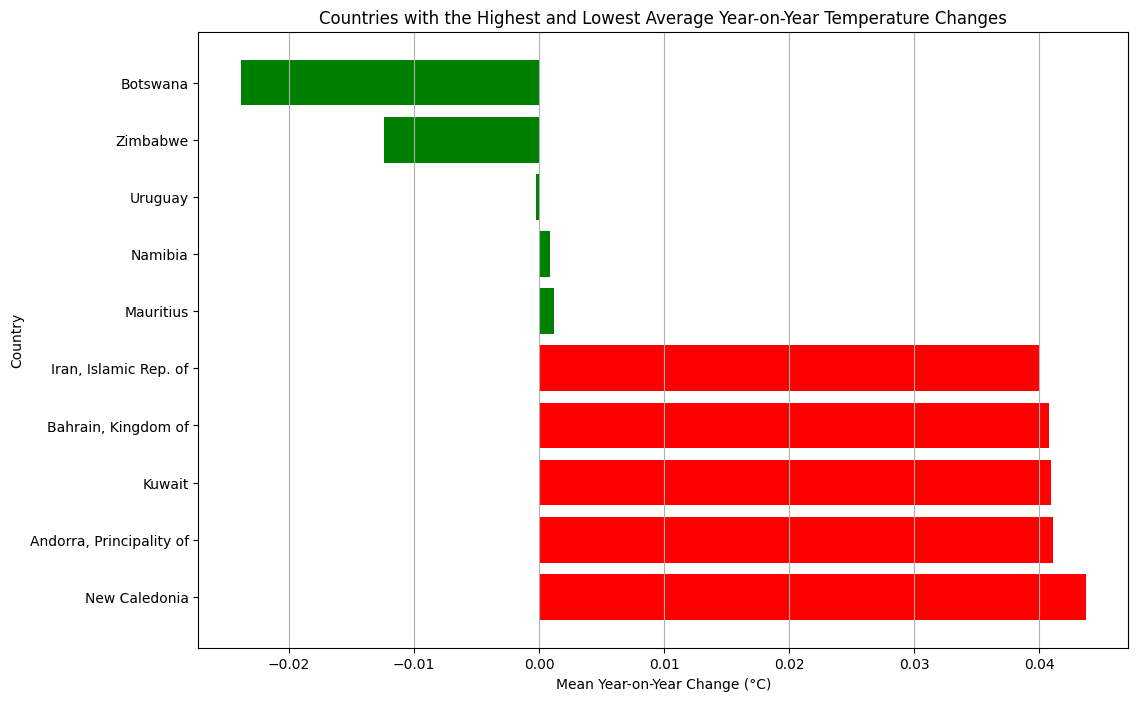

In [10]:
year_on_year_changes = data[year_columns].diff(axis=1)

mean_year_on_year_changes = year_on_year_changes.mean(axis=1)
country_changes = pd.DataFrame({'Country': data['Country'], 'Mean Year-on-Year Change': mean_year_on_year_changes})

highest_changes = country_changes.nlargest(5, 'Mean Year-on-Year Change')
lowest_changes = country_changes.nsmallest(5, 'Mean Year-on-Year Change').iloc[::-1]
extreme_changes = pd.concat([highest_changes, lowest_changes])

plt.figure(figsize=(12, 8))
plt.barh(extreme_changes['Country'], extreme_changes['Mean Year-on-Year Change'], color=['red' if x in highest_changes['Country'].values else 'green' for x in extreme_changes['Country']])
plt.title('Countries with the Highest and Lowest Average Year-on-Year Temperature Changes')
plt.xlabel('Mean Year-on-Year Change (°C)')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

## Regression
Here a regression is performed on the mean temperature change and the year

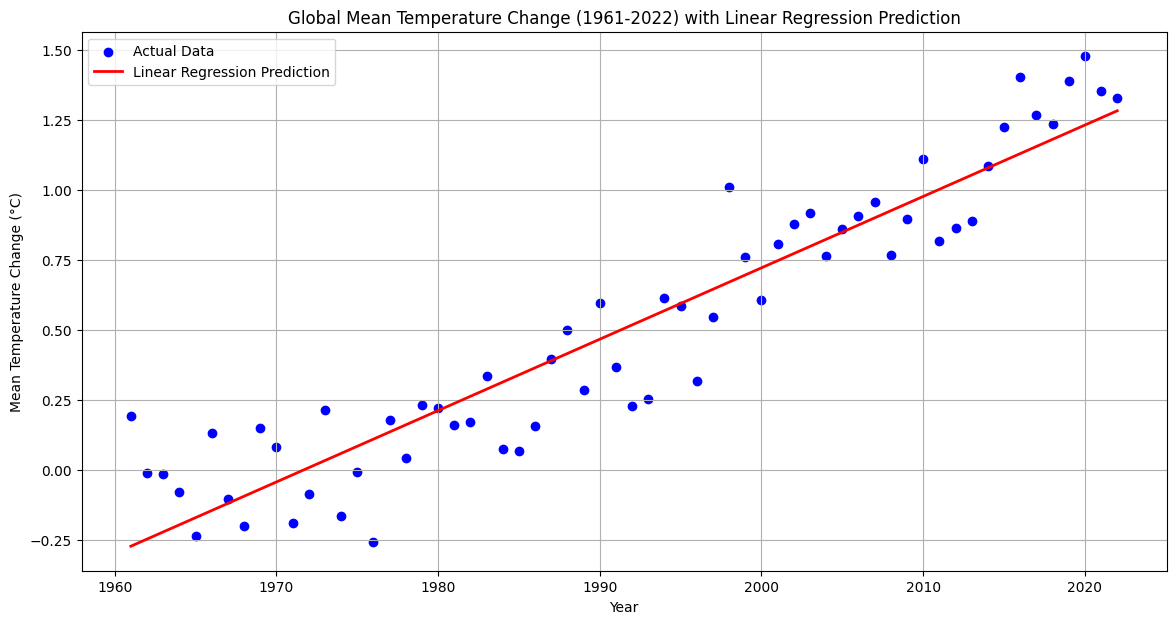

Mean Squared Error (MSE): 0.029148706379970697
Coefficient of Determination (R^2): 0.8773228070208207


In [5]:
# Regression Analysis for Global Data
X = np.array(year_columns.str[1:].astype(int)).reshape(-1, 1)  # Convert years to integers
y = mean_temperature_changes.values.reshape(-1, 1)  # Mean temperature change values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Prediction')
plt.title('Global Mean Temperature Change (1961-2022) with Linear Regression Prediction')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R^2): {r2}')

We can see from the results that there is a clear correlation between the year and the mean temperature change, and an R squared of 0.877 confirms that the year has a strong explanatory power for the temperature change